In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load Dataset
data = pd.read_csv('supermarket_sales.csv')

# Step 3: Data Overview
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Text(0, 0.5, 'Revenue')

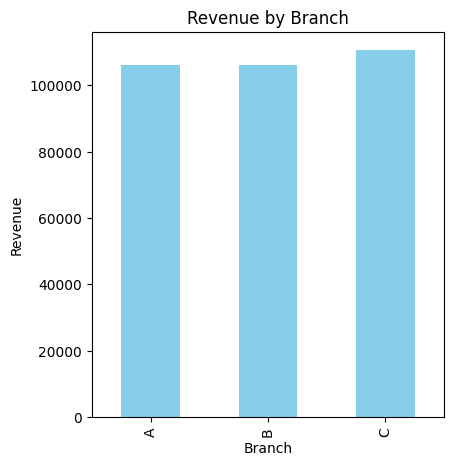

In [ ]:
# Step 4: Branch Performance Analysis
branch_revenue = data.groupby('Branch')['Total'].sum()
branch_rating = data.groupby('Branch')['Rating'].mean()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
branch_revenue.plot(kind='bar', color='skyblue', title='Revenue by Branch')
plt.ylabel('Revenue')


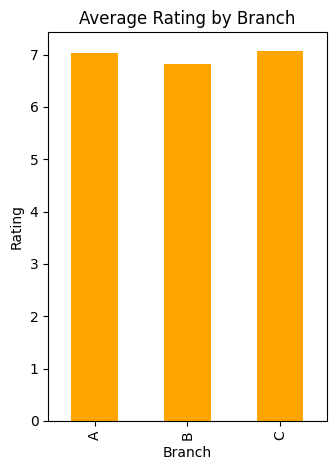

In [ ]:
plt.subplot(1, 2, 2)
branch_rating.plot(kind='bar', color='orange', title='Average Rating by Branch')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

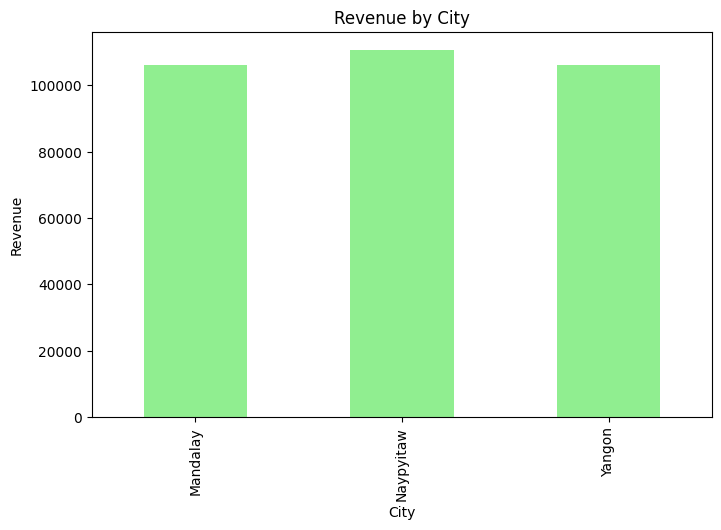

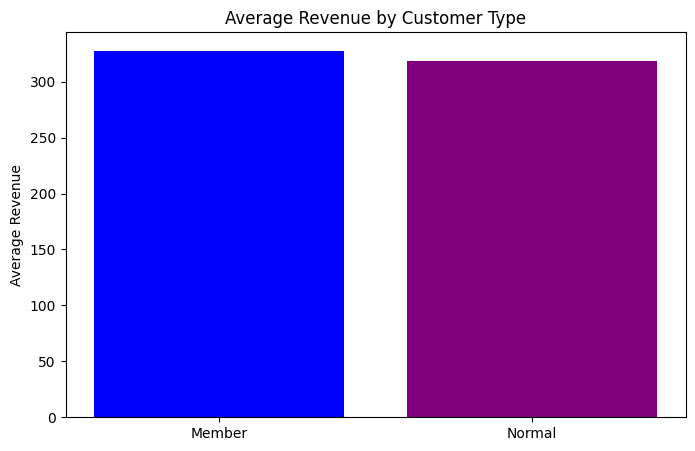

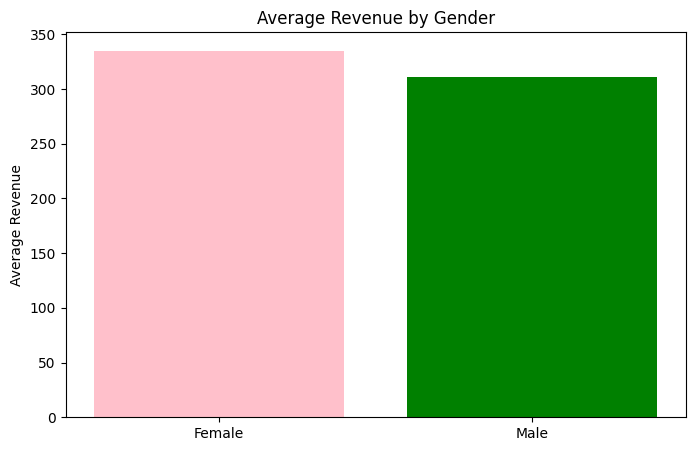

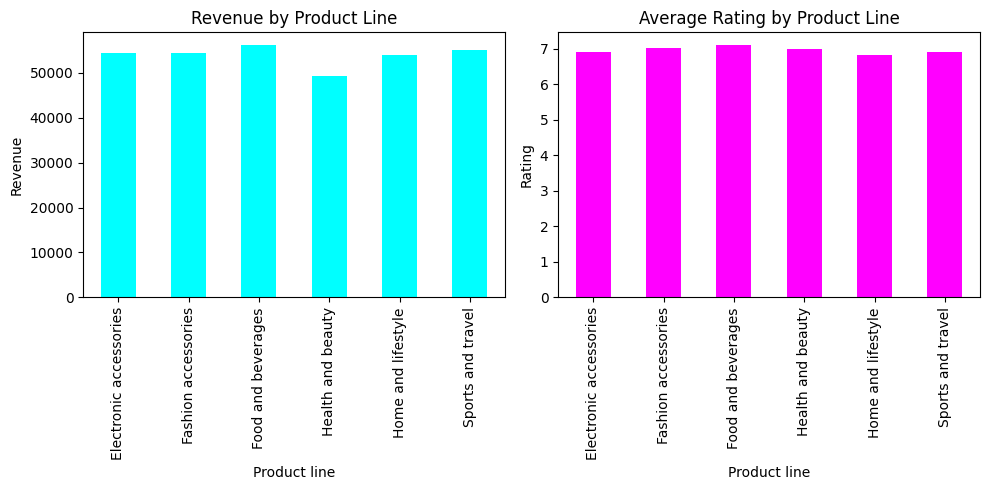

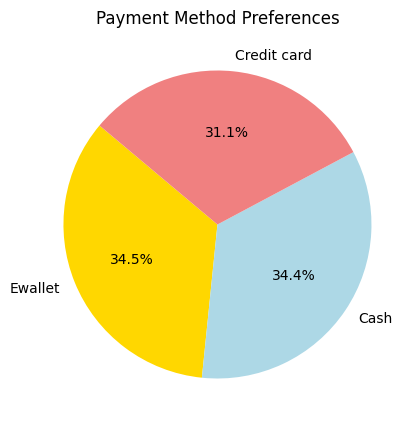

<ipython-input-5-43ca867c954f>:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


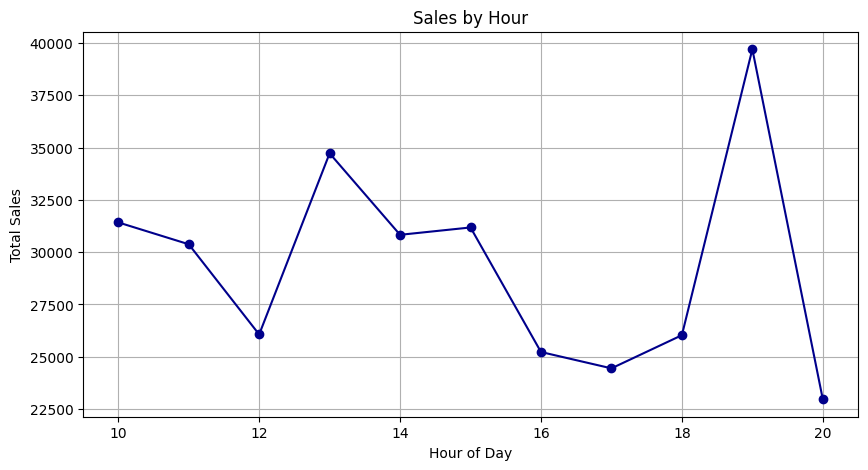

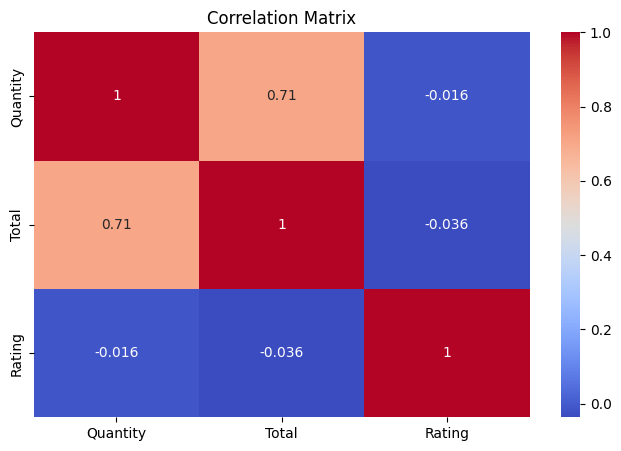

In [ ]:
# Step 5: City-Wise Revenue Analysis
city_revenue = data.groupby('City')['Total'].sum()
plt.figure(figsize=(8, 5))
city_revenue.plot(kind='bar', color='lightgreen', title='Revenue by City')
plt.ylabel('Revenue')
plt.show()

# Step 6: Customer Demographics Analysis
customer_type_revenue = data.groupby('Customer type')['Total'].mean()
gender_revenue = data.groupby('Gender')['Total'].mean()

plt.figure(figsize=(8, 5))
plt.bar(customer_type_revenue.index, customer_type_revenue.values, color=['blue', 'purple'])
plt.title('Average Revenue by Customer Type')
plt.ylabel('Average Revenue')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(gender_revenue.index, gender_revenue.values, color=['pink', 'green'])
plt.title('Average Revenue by Gender')
plt.ylabel('Average Revenue')
plt.show()

# Step 7: Product Line Performance
product_line_revenue = data.groupby('Product line')['Total'].sum()
product_line_rating = data.groupby('Product line')['Rating'].mean()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
product_line_revenue.plot(kind='bar', color='cyan', title='Revenue by Product Line')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
product_line_rating.plot(kind='bar', color='magenta', title='Average Rating by Product Line')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Step 8: Payment Method Preferences
payment_method_count = data['Payment'].value_counts()
plt.figure(figsize=(8, 5))
payment_method_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightcoral'])
plt.title('Payment Method Preferences')
plt.ylabel('')
plt.show()

# Step 9: Sales Time Patterns
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
hourly_sales = data.groupby('Hour')['Total'].sum()

plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='line', marker='o', title='Sales by Hour', color='darkblue')
plt.ylabel('Total Sales')
plt.xlabel('Hour of Day')
plt.grid()
plt.show()

# Step 10: Correlation Analysis
correlation_matrix = data[['Quantity', 'Total', 'Rating']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

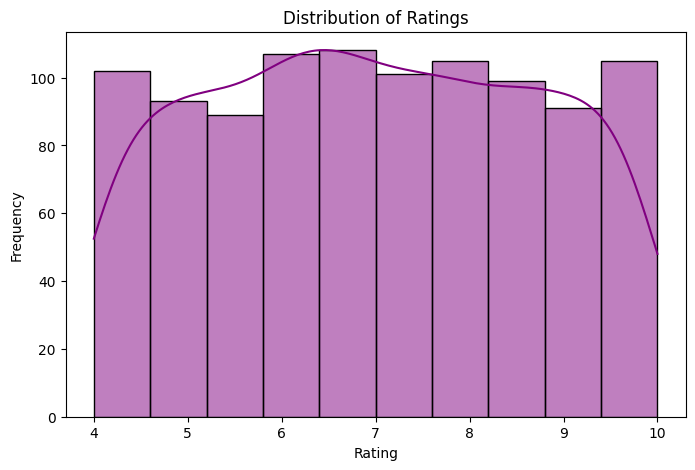

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

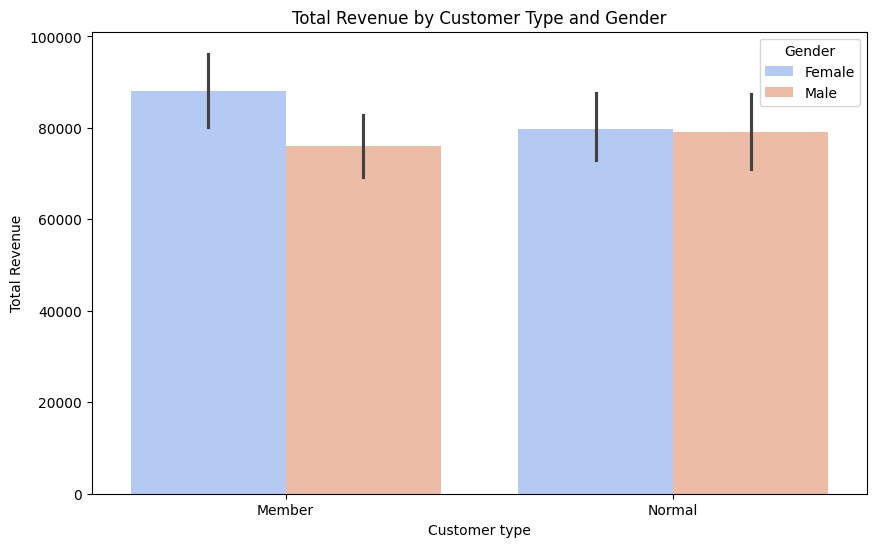

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Customer type', y='Total', hue='Gender', estimator=sum, palette='coolwarm')
plt.title('Total Revenue by Customer Type and Gender')
plt.ylabel('Total Revenue')
plt.show()


<ipython-input-5-16e79b5150bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Product line', y='Quantity', estimator=sum, palette='viridis')


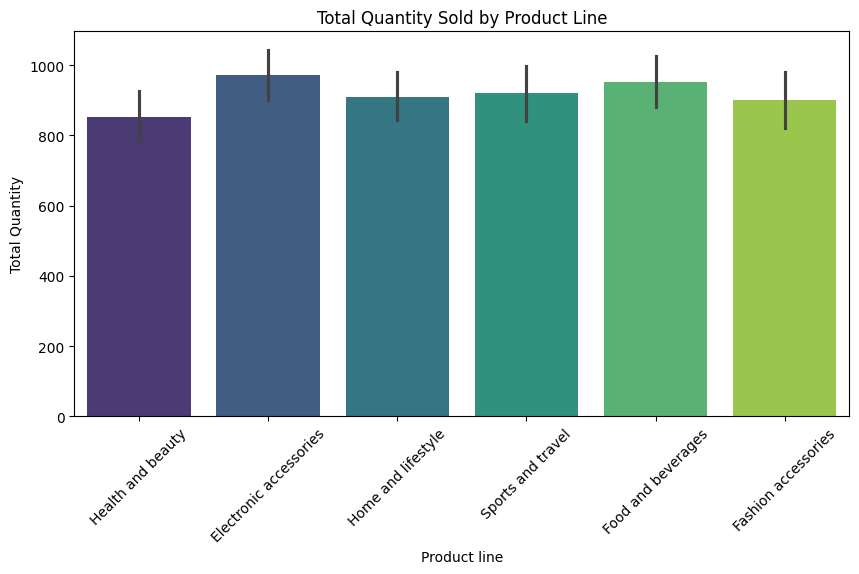

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Product line', y='Quantity', estimator=sum, palette='viridis')
plt.title('Total Quantity Sold by Product Line')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()


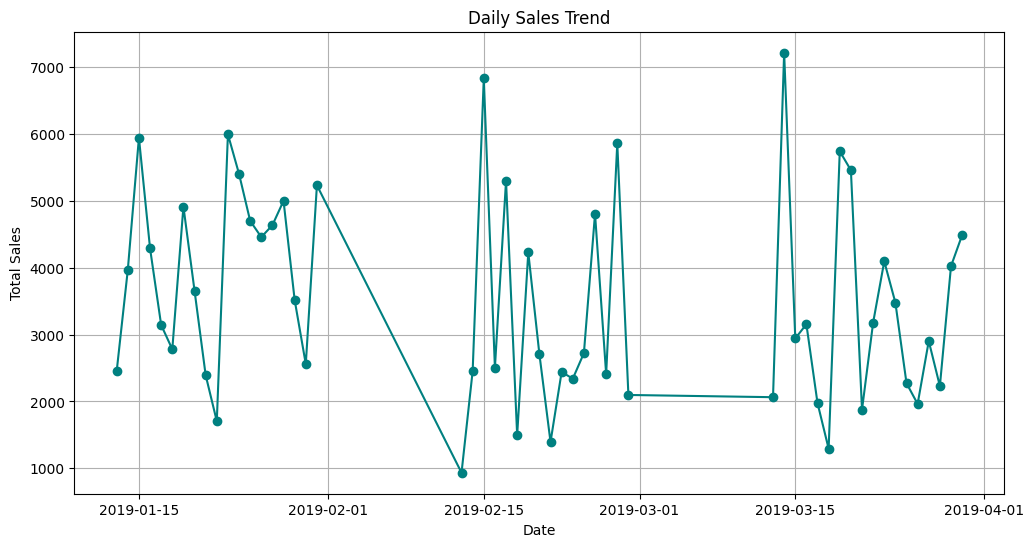

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')
daily_sales = data.groupby('Date')['Total'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='teal')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


<ipython-input-8-b153eac84209>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Payment', y='Total', palette='pastel')


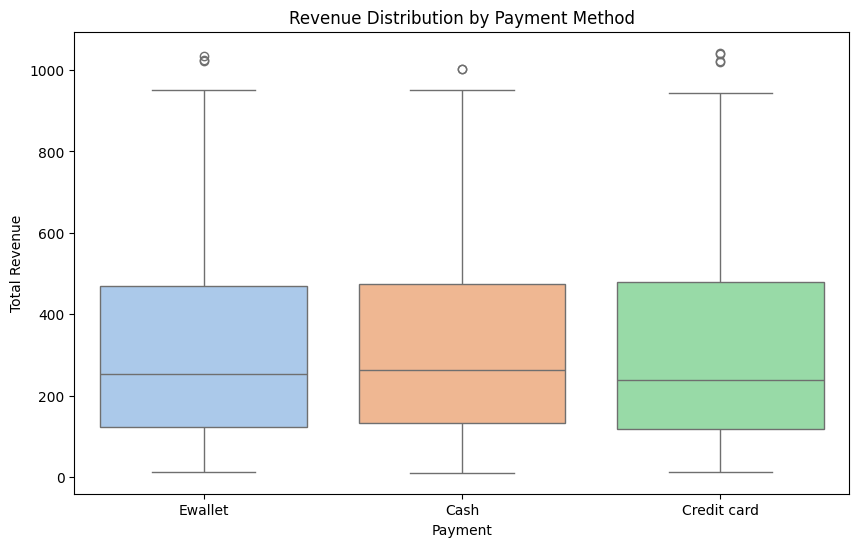

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Payment', y='Total', palette='pastel')
plt.title('Revenue Distribution by Payment Method')
plt.ylabel('Total Revenue')
plt.show()


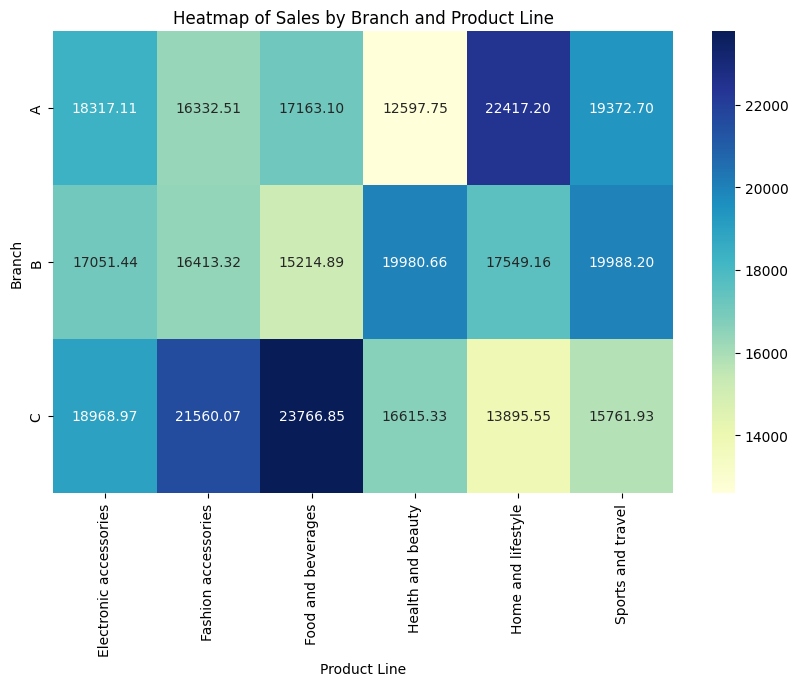

In [ ]:
branch_product_sales = data.pivot_table(values='Total', index='Branch', columns='Product line', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(branch_product_sales, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Sales by Branch and Product Line')
plt.ylabel('Branch')
plt.xlabel('Product Line')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

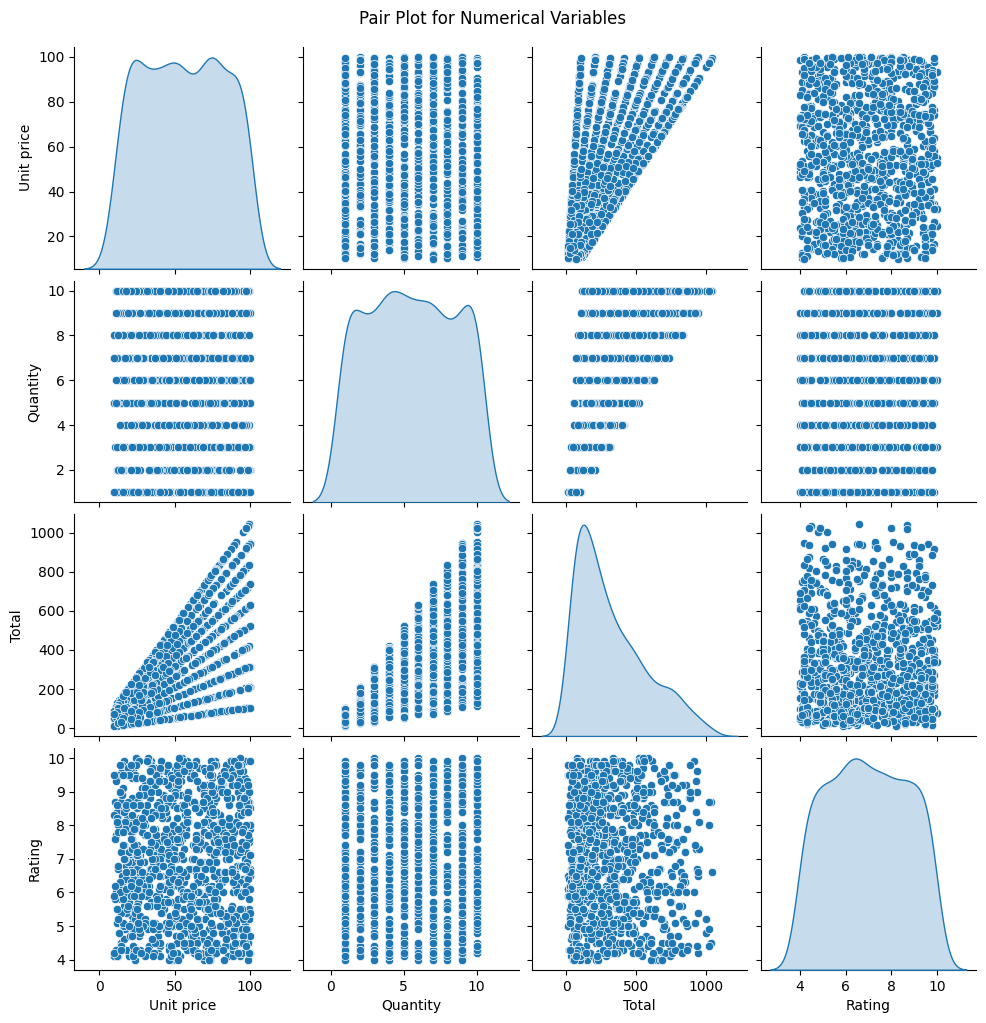

In [ ]:
sns.pairplot(data[['Unit price', 'Quantity', 'Total', 'Rating']], diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()


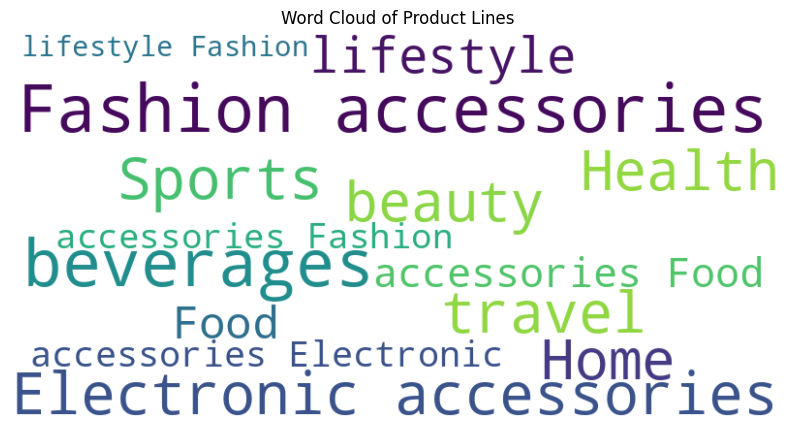

In [ ]:
from wordcloud import WordCloud

text = ' '.join(data['Product line'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Lines')
plt.show()


Logistic Regression Accuracy: 0.48333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48       151
           1       0.48      0.50      0.49       149

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300

Random Forest Accuracy: 0.5433333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.55       151
           1       0.54      0.53      0.54       149

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300

SVM Accuracy: 0.49666666666666665
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48       151
           1       0.49      0.53     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
ANN Accuracy: 0.49333333333333335
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43       151
           1       0.49      0.61      0.54       149

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



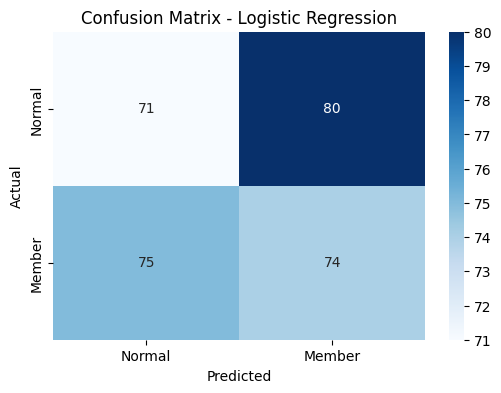

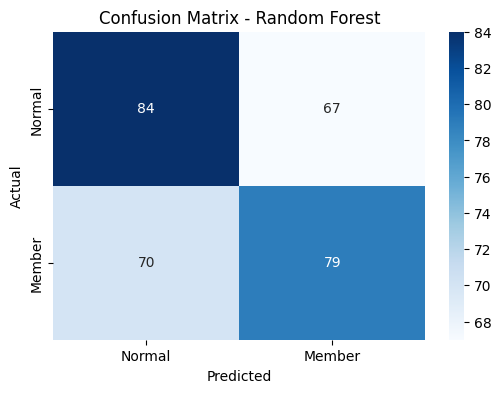

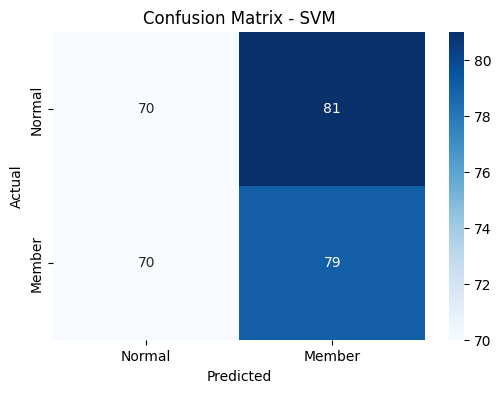

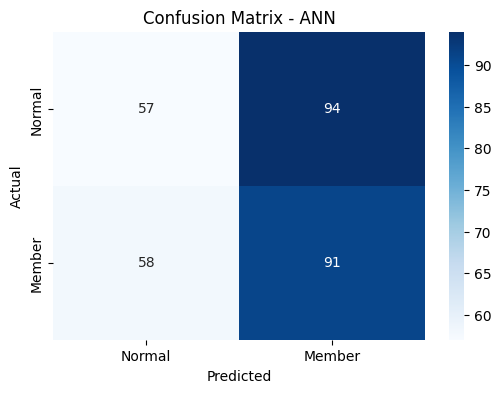

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load the Dataset
data = pd.read_csv('supermarket_sales.csv')

# Step 3: Data Preprocessing
# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Product line', 'Payment', 'City', 'Branch']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Convert Customer type to binary (0: Normal, 1: Member)
data['Customer type'] = data['Customer type'].apply(lambda x: 1 if x == 'Member' else 0)

# Select Features and Target
X = data[['Unit price', 'Quantity', 'Total', 'Payment', 'Product line', 'City', 'Branch']]
y = data['Customer type']

# Standardize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Train and Evaluate Models

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Artificial Neural Network (ANN)
ann = Sequential()
ann.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# ANN Evaluation
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))

# Step 6: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'SVM', 'ANN']
predictions = [y_pred_logreg, y_pred_rf, y_pred_svm, y_pred_ann.ravel()]
for i, model in enumerate(models):
    cm = confusion_matrix(y_test, predictions[i])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Member'], yticklabels=['Normal', 'Member'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.2866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.39      0.31        99
           1       0.34      0.11      0.16        95
           2       0.31      0.35      0.33       106

    accuracy                           0.29       300
   macro avg       0.30      0.28      0.27       300
weighted avg       0.30      0.29      0.27       300

Random Forest Accuracy: 0.3233333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.30      0.30        99
           1       0.33      0.34      0.33        95
           2       0.34      0.33      0.34       106

    accuracy                           0.32       300
   macro avg       0.32      0.32      0.32       300
weighted avg       0.32      0.32      0.32       300



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
ANN Accuracy: 0.31333333333333335
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.34      0.31        99
           1       0.35      0.20      0.25        95
           2       0.34      0.39      0.36       106

    accuracy                           0.31       300
   macro avg       0.32      0.31      0.31       300
weighted avg       0.32      0.31      0.31       300



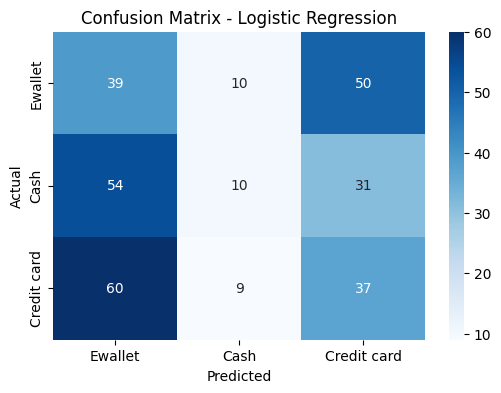

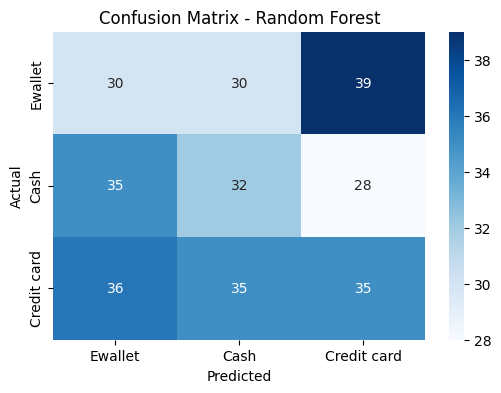

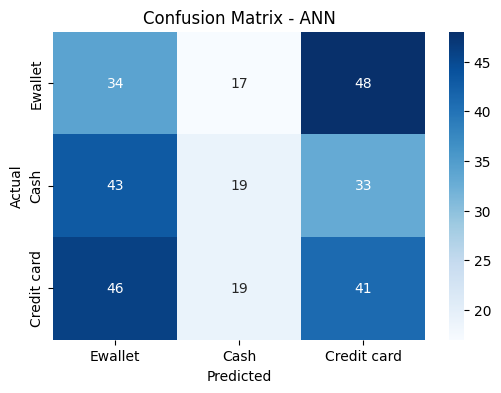

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load Dataset
data = pd.read_csv('supermarket_sales.csv')

# Step 3: Data Preprocessing
# Step 3: Data Preprocessing
# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Product line', 'City', 'Branch', 'Payment', 'Customer type'] # Include Customer type
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Select Features and Target
X = data[['Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Total', 'City', 'Branch']]
y = data['Payment']  # Target: Payment (0: Ewallet, 1: Cash, 2: Credit card)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train and Evaluate Models

# Logistic Regression
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ANN
ann = Sequential()
ann.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(3, activation='softmax'))  # 3 classes for payment
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# ANN Evaluation
y_pred_ann = np.argmax(ann.predict(X_test), axis=1)
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))

# Step 5: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'ANN']
predictions = [y_pred_logreg, y_pred_rf, y_pred_ann]
for i, model in enumerate(models):
    cm = confusion_matrix(y_test, predictions[i])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ewallet', 'Cash', 'Credit card'],
                yticklabels=['Ewallet', 'Cash', 'Credit card'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
